In [86]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("CBS_PC6_2016_v2_tested.csv")
df = df[["PC6","P_NW_MIG_A","M_INKHH","WOZWONING","UITKMINAOW"]]
df2 = pd.read_csv("Amsterdam_PC6_CBS_2016_V2.csv")
df2 = df2[["PC6"]]
df = df.merge(df2, on="PC6")
df = df.rename(columns={"M_INKHH": "MIH", "UITKMINAOW": "SSC", "WOZWONING": "ARV", "P_NW_MIG_A":"NWIRP"})

In [3]:
df.to_csv("CBS_AMS_2016V2_P.csv")

In [14]:
def clean_df(df):
    for f in df.columns:
        df = df[df[f] != -99997]
        df = df[df[f] != 'onclassificeerbaar']
        df = df[df[f] != '-99997']
    return df

In [39]:
MIH = clean_df(df[['PC6','MIH']]).reset_index(drop=True)
SSC = clean_df(df[['PC6','SSC']]).reset_index(drop=True)
ARV = clean_df(df[["PC6","ARV"]]).reset_index(drop=True)
NWIRP = clean_df(df[["PC6", "NWIRP"]]).reset_index(drop=True)

/home/frank/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [40]:
hhinkomen = ['00-20 laag','00-40 laag tot onder midden','00-60 laag tot midden','20-40 onder midden', '20-60 onder midden tot midden','20-80 onder midden tot boven midden','40-60 midden','40-80 midden tot boven midden','60-80 boven midden', '60-100 boven midden tot hoog', '80-100 hoog']
n_hhinkomen = [1,2,3,4,5,6,7,8,9,10,11]
MIH["MIH"] = MIH["MIH"].replace(hhinkomen, n_hhinkomen)

In [41]:
MIH.to_csv("MIH.csv")
SSC.to_csv("SSC.csv")
ARV.to_csv("ARV.csv")
NWIRP.to_csv("NWIRP.csv")

In [42]:
df1 = pd.merge(MIH, ARV, on=['PC6'])
df2 = pd.merge(df1, NWIRP, on=['PC6'])
df3 = pd.merge(df2, SSC, on=['PC6'])

In [82]:
#Using Pearson Correlation
def heatmap_pearson(df):
    plt.figure(figsize=(6,5))
    sns.set(font_scale=1.4)
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.savefig('heatmap_attributes.png')
    plt.show()

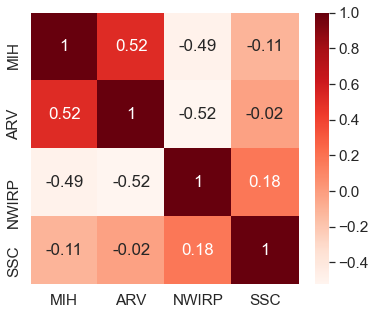

In [83]:
heatmap_pearson(df3)

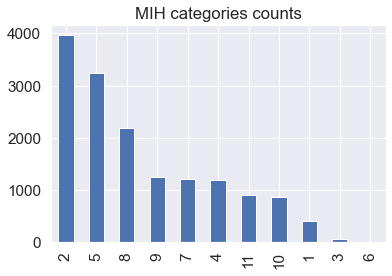

In [90]:
#MIH.MIH.value_counts().plot(kind='bar', title="MIH categories counts")

In [68]:
MIH = MIH.sort_values(by="MIH")
MIH["MIH"] = MIH['MIH'].rank(method='first')
MIH.loc[:,'MIH']=pd.qcut(MIH['MIH'],10,labels=np.arange(1,11,1))
MIH['MIH'] = MIH.MIH.astype('int32')
MIH = MIH.reset_index(drop=True)

In [46]:
#MIH.MIH.value_counts().plot(kind='bar', title="MIH decile counts")

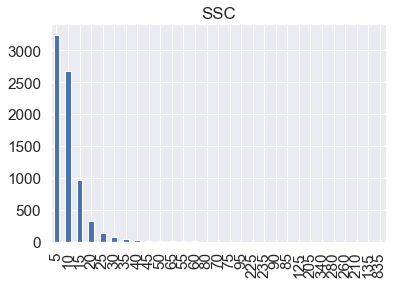

In [47]:
SSC.SSC.value_counts().plot(kind='bar', title="SSC")

In [69]:
SSC = SSC.sort_values(by="SSC")
SSC["SSC"] = SSC['SSC'].rank(method='first')
SSC.loc[:,'SSC']=pd.qcut(SSC['SSC'],10,labels=np.arange(1,11,1))
SSC['SSC'] = SSC.SSC.astype('int32')
SSC = SSC.reset_index(drop=True)

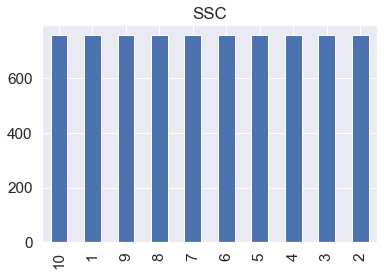

In [49]:
SSC.SSC.value_counts().plot(kind='bar', title="SSC")

In [73]:
# ARV.ARV.value_counts().plot(kind='bar', title="ARV") alot of values
ARV = ARV.sort_values(by="ARV")
ARV["ARV"] = ARV['ARV'].rank(method='first')
ARV.loc[:,'ARV']=pd.qcut(ARV['ARV'],10,labels=np.arange(1,11,1))
ARV['ARV'] = ARV.ARV.astype('int32')
ARV = ARV.reset_index(drop=True)

In [70]:
NWIRP = NWIRP.sort_values(by="NWIRP")
NWIRP["NWIRP"] = NWIRP['NWIRP'].rank(method='first')
NWIRP.loc[:,'NWIRP']=pd.qcut(NWIRP['NWIRP'],10,labels=np.arange(1,11,1))
NWIRP['NWIRP'] = NWIRP.NWIRP.astype('int32')
NWIRP = NWIRP.reset_index(drop=True)

In [74]:
x = pd.merge(MIH, ARV, on=['PC6'])
y = pd.merge(x, NWIRP, on=['PC6'])
z = pd.merge(y, SSC, on=['PC6'])

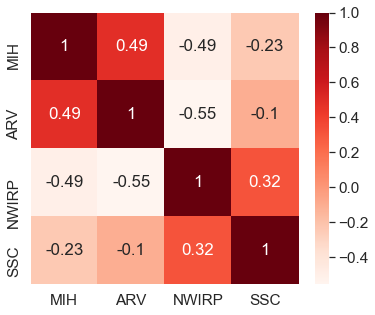

In [84]:
heatmap_pearson(z)

In [93]:
pano_df = pd.read_csv("lon_lat_pano-url_pano-id_pc6.csv")
pano_df = pano_df.drop("Unnamed: 0", axis=1)
pano_df = pano_df.rename(columns={"pc6": "PC6"})
pano_df["PC6"] = pano_df.PC6.str.replace(' ', '')

pano_list = list(pano_df["pano_id"])
pano_exist = []
m = 0

for n in range(len(pano_list)):
    file_name = 'gview_codes_4/{}.npz'.format(pano_list[n])
    if os.path.exists(file_name):
        pano_exist.append(pano_list[n])
        m = m + 1
    #if m % 200 == 0:
        #print('Image: {} / {} done.'.format(m, len(pano_list)))

exists_df = pd.DataFrame(pano_exist,columns=['pano_id'])
pano_df = pano_df.merge(exists_df, how='inner', on='pano_id')
pano_df = pano_df.drop_duplicates(subset=['PC6'])

In [95]:
MIH_df = MIH.merge(pano_df, how='inner', on='PC6')
MIH_df = MIH_df.drop(['url'], axis=1)
#labels1_df.to_pickle("amsterdam_labels_1.p")

ARV_df = ARV.merge(pano_df, how='inner', on='PC6')
ARV_df = ARV_df.drop(['url'], axis=1)
#labels2_df.to_pickle("amsterdam_labels_2.p")

SSC_df = SSC.merge(pano_df, how='inner', on='PC6')
SSC_df = SSC_df.drop(['url'], axis=1)

NWIRP_df = NWIRP.merge(pano_df, how='inner', on='PC6')
NWIRP_df = NWIRP_df.drop(['url'], axis=1)

In [110]:
SSC_df

,PC6,SSC,lon,lat,pano_id
0,1053DP,1,4.867373,52.365873,TMX7316010203-001631_pano_0000_000279
1,1094GM,1,4.932720,52.364210,TMX7316010203-001209_pano_0000_000676
2,1052BC,1,4.876364,52.381781,TMX7316060226-000473_pano_0000_003046
3,1052BG,1,4.879852,52.382963,TMX7316060226-000473_pano_0006_000136
4,1052BJ,1,4.878663,52.382252,TMX7316060226-000473_pano_0000_003104
...,...,...,...,...,...
4698,1073KG,10,4.899538,52.350080,TMX7316010203-001168_pano_0000_004672
4699,1098WC,10,4.946970,52.344269,TMX7316010203-001197_pano_0000_003045
4700,1104DB,10,4.981255,52.320178,TMX7316010203-001242_pano_0000_000768
4701,1064VH,10,4.814774,52.378089,TMX7316060226-000482_pano_0001_000713


In [104]:
np.random.seed(42)

In [105]:
MIH_train_indexes, MIH_test_indexes = train_test_split(MIH_df.index, test_size=0.3)
MIH_train = MIH_df.iloc[MIH_train_indexes]
MIH_test = MIH_df.iloc[MIH_test_indexes]

ARV_train_indexes, ARV_test_indexes = train_test_split(ARV_df.index, test_size=0.3)
ARV_train = ARV_df.iloc[ARV_train_indexes]
ARV_test = ARV_df.iloc[ARV_test_indexes]

SSC_train_indexes, SSC_test_indexes = train_test_split(SSC_df.index, test_size=0.3)
SSC_train = SSC_df.iloc[SSC_train_indexes]
SSC_test = SSC_df.iloc[SSC_test_indexes]

NWIRP_train_indexes, NWIRP_test_indexes = train_test_split(NWIRP_df.index, test_size=0.3)
NWIRP_train = NWIRP_df.iloc[NWIRP_train_indexes]
NWIRP_test = NWIRP_df.iloc[NWIRP_test_indexes]

In [111]:
MIH_train.to_pickle("MIH_TRAIN.p")
MIH_test.to_pickle("MIH_TEST.p")

ARV_train.to_pickle("ARV_TRAIN.p")
ARV_test.to_pickle("ARV_TEST.p")

SSC_train.to_pickle("SSC_TRAIN.p")
SSC_test.to_pickle("SSC_TEST.p")

NWIRP_train.to_pickle("NWIRP_TRAIN.p")
NWIRP_test.to_pickle("NWIRP_TEST.p")